<a href="https://colab.research.google.com/github/Yong-Hoon-In/YH/blob/master/%ED%8A%B9%ED%97%88%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
! bash /content/Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab_light_210108.sh
!git clone https://github.com/stopwords-iso/stopwords-ko

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.io as pio
from gensim.models import Word2Vec, FastText, Doc2Vec
from konlpy.tag import Mecab
import re
import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from konlpy.tag import Mecab
from wordcloud import WordCloud,STOPWORDS
from sklearn.manifold import TSNE

In [ ]:
df=pd.read_excel('/content/활용특허데이터.xlsx')
print(f"df has {df.shape[0]}rows and {df.shape[1]}columnss")

df has 6969rows and 21columnss


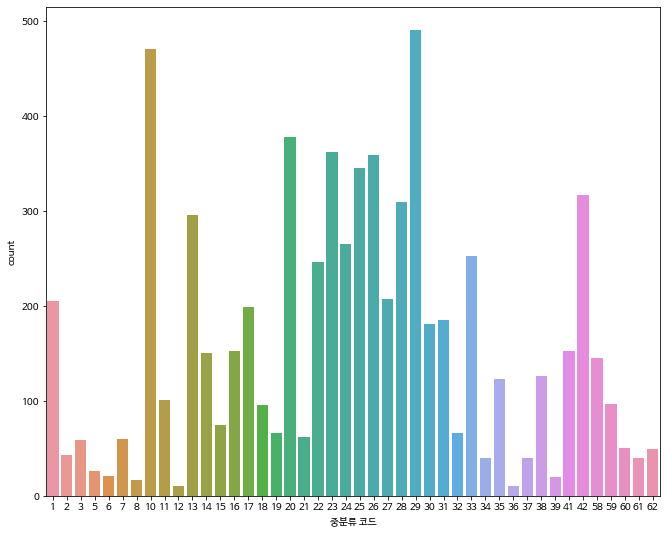

In [ ]:
fig,ax=plt.subplots(figsize=(11,9))
sns.countplot(data=df,x='중분류 코드')

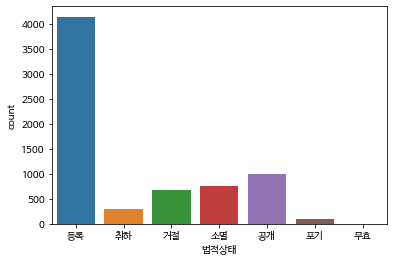

In [ ]:
sns.countplot(data=df,x='법적상태')

In [ ]:
fig = dict({
    "data": [{"type": "bar",
              "x": df['출원인'].value_counts().head(20).index,
              "y": df['출원인'].value_counts().head(20).values}],
    "layout": {"title": {"text": "최다출원인 20명 비교"}}
})

pio.show(fig)

In [ ]:
df['IPC']=df['메인 IPC'].str[0]
df['출원년']=df['출원일'].str.split('.').str[0]
df['IPC2']=df['메인 IPC'].str[1:3]

In [ ]:
fig = go.Figure()
for i in df['IPC'].value_counts().index:
    fig.add_trace(go.Scatter(x=df[df['IPC']==i]['출원년'].value_counts().sort_index().index,
                             y=df[df['IPC']==i]['출원년'].value_counts().sort_index().values,
                             mode='lines+markers',fill="tozeroy",
                         name=i))
fig.update_layout(title='연도별 IPC 섹션 트렌드',
                   xaxis_title='YEAR',yaxis_title='IPC별 출원 특허수',title_x=0.4)
fig.show()

In [ ]:
df[df['IPC']=='A']['메인 IPC'].str[1:4].value_counts().index[:20]

Index(['23L', '01G', '01K', '61K', '41D', '23K', '47B', '63F', '23G', '47G',
       '47C', '23F', '61B', '23B', '44C', '01N', '43B', '47J', '63B', '41B'],
      dtype='object')

In [ ]:
df['IP3']=df['메인 IPC'].str[1:4]

In [ ]:
fig = go.Figure()
for i in df[df['IPC']=='A']['메인 IPC'].str[1:4].value_counts().index[:20]:
    fig.add_trace(go.Scatter(x=df[df['IP3']==i]['출원년'].value_counts().sort_index().index,
                             y=df[df['IP3']==i]['출원년'].value_counts().sort_index().values,
                             mode='lines+markers',fill="tozeroy",
                         name=i))
fig.update_layout(title='IPC A의 IPC클래스 트렌드',
                   xaxis_title='YEAR',yaxis_title='IPC A의 IPC클래스 트렌드',title_x=0.4)
fig.show()

In [ ]:
fig = go.Figure()
for i in df[df['IPC']=='B']['메인 IPC'].str[1:4].value_counts().index:
    fig.add_trace(go.Scatter(x=df[df['IP3']==i]['출원년'].value_counts().sort_index().index,
                             y=df[df['IP3']==i]['출원년'].value_counts().sort_index().values,
                             mode='lines+markers',fill="tozeroy",
                         name=i))
fig.update_layout(title='IPC B의 IPC클래스 트렌드',
                   xaxis_title='YEAR',yaxis_title='클래스별 출원 특허수',title_x=0.4)
fig.show()

In [ ]:
df2=df[df['출원년'].astype('int32')>1994]
df2=df2[df2['출원년'].astype('int32')<2021]

In [ ]:
fig = go.Figure()
for i in df2['중분류 코드'].value_counts().index[:10]:
    fig.add_trace(go.Scatter(x=df2[df2['중분류 코드']==i]['출원년'].value_counts().sort_index().index,
                             y=df2[df2['중분류 코드']==i]['출원년'].value_counts().sort_index().values,
                             mode='lines+markers',fill="tozeroy",
                         name=i))
fig.update_layout(title='중분류 변화 트렌드',
                   xaxis_title='YEAR',yaxis_title='중분류별 출원 특허수',title_x=0.4)
fig.show()

In [ ]:
df29=df[df['중분류 코드']==29]

In [ ]:
df29['세분류']=df29['세세분류'].str[:4]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = go.Figure()
for i in df29['세분류'].value_counts().index[:10]:
    fig.add_trace(go.Scatter(x=df29[df29['세분류']==i]['출원년'].value_counts().sort_index().index,
                             y=df29[df29['세분류']==i]['출원년'].value_counts().sort_index().values,
                             mode='lines+markers',fill="tozeroy",
                         name=i))
fig.update_layout(title='중분류29의 세분류 변화 트렌드',
                   xaxis_title='YEAR',yaxis_title='중분류별 출원 특허수',title_x=0.4)
fig.show()

word_cloud

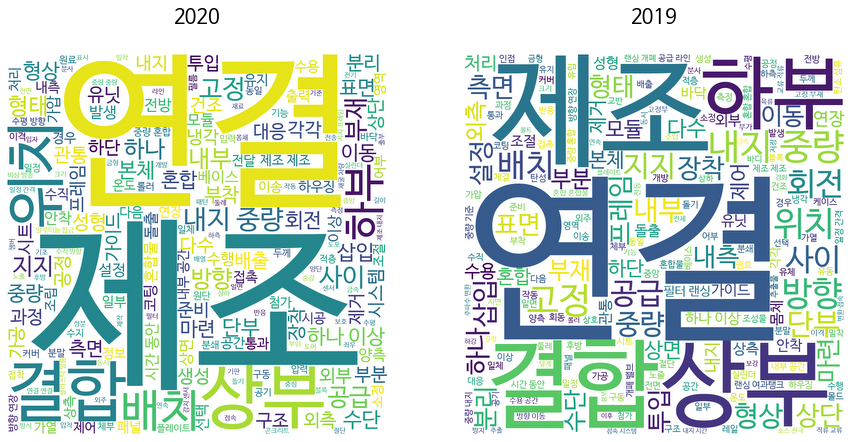

In [ ]:
Mecab = Mecab()
def make_wordcloud(data,year):
    txt = ' '.join(list(df[df['출원년'].astype(int)==year]['독립항']))
    txt = Mecab.nouns(txt)
    stopwords = set(STOPWORDS) 
    stopwords.add('상기'); stopwords.add('발명'); stopwords.add('포함'); stopwords.add('이용'); stopwords.add('방법'); stopwords.add('구비')
    stopwords.add('형성'); stopwords.add('제공'); stopwords.add('장치'); stopwords.add('사용'); stopwords.add('상태'); stopwords.add('구성')
    stopwords.add('설치'); stopwords.add('단계'); stopwords.add('복수'); stopwords.add('특징'); stopwords.add('가능'); stopwords.add('이용')
    stopwords.add('청구')
    wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
        stopwords=stopwords,background_color='white',width=1000,height=1000).generate(' '.join(txt))

    return wc.to_image()

wc_2020 = make_wordcloud(df,2020)
wc_2019 = make_wordcloud(df,2019)

plt.figure(figsize=(15,15))


plt.subplot(1, 2, 2)
plt.title('2019'+'\n', size = 20)
plt.imshow(wc_2020, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거

plt.subplot(1, 2, 1)
plt.title('2020'+'\n', size = 20)
plt.imshow(wc_2019, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거

plt.show()

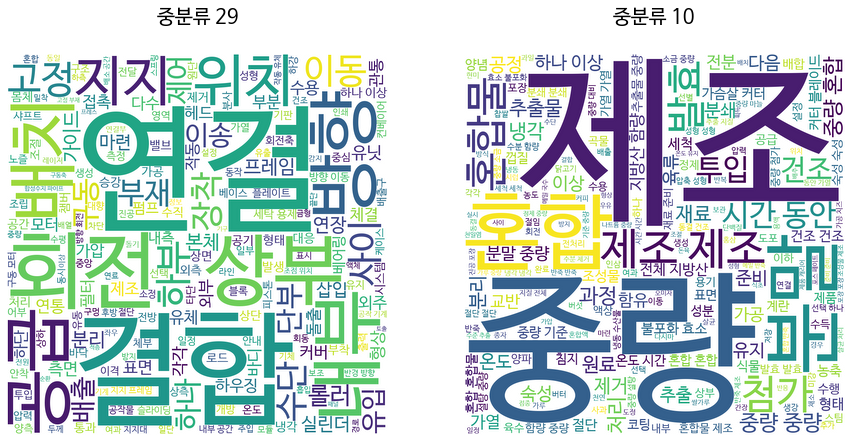

In [ ]:
def make_wordcloud(data,code):
    txt = ' '.join(list(df[df['중분류 코드']==code]['독립항']))
    txt = Mecab.nouns(txt)
    stopwords = set(STOPWORDS) 
    stopwords.add('상기'); stopwords.add('발명'); stopwords.add('포함'); stopwords.add('이용'); stopwords.add('방법'); stopwords.add('구비')
    stopwords.add('형성'); stopwords.add('제공'); stopwords.add('장치'); stopwords.add('사용'); stopwords.add('상태'); stopwords.add('구성')
    stopwords.add('설치'); stopwords.add('단계'); stopwords.add('복수'); stopwords.add('특징'); stopwords.add('가능'); stopwords.add('이용')
    stopwords.add('청구'); stopwords.add('내지')
    wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
        stopwords=stopwords,background_color='white',width=1000,height=1000).generate(' '.join(txt))

    return wc.to_image()

wc_29 = make_wordcloud(df,29)
wc_10 = make_wordcloud(df,10)

plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.title('중분류 29'+'\n', size = 20)
plt.imshow(wc_29, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거

plt.subplot(1, 2, 2)
plt.title('중분류 10'+'\n', size = 20)
plt.imshow(wc_10, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거

plt.show()

word to Vec

In [ ]:
stopwords_file = list(open('/content/stopwords-ko/stopwords-ko.txt',"r"))
list_stopword = []
for i in stopwords_file:
    list_stopword.append(i[:-1])
list_stopword.append('상기')
list_stopword.append('발명')
list_stopword.append('포함')
list_stopword.append('이용')
list_stopword.append('방법')
list_stopword.append('구비')
list_stopword.append('형성')
list_stopword.append('제공')
list_stopword.append('사용')
list_stopword.append('상태')
list_stopword.append('구성')
list_stopword.append('설치')
list_stopword.append('단계')
list_stopword.append('복수')
list_stopword.append('특징')
list_stopword.append('가능')
list_stopword.append('이용')
list_stopword.append('미만')
list_stopword.append('청구항')
list_stopword.append('내지')

In [ ]:
def mecab_noun(data):
    result = Mecab.nouns(data)
    result = ' '.join(result)
    return result

def out_stopwords(data, list_stopwords=list_stopword):
    data = data.split(" ")
    list_stopwords = list_stopwords
    data = [token for token in data if token not in list_stopwords]
    result = ' '.join(data)
    return result


def clean_str(text):
    pattern = '\s[가-힣]\s' 
    text = re.sub(pattern=pattern, repl=' ', string=text)
    return text   


In [ ]:
txt=df['독립항'].apply(mecab_noun)

In [ ]:
txt.apply(clean_str)
txt=txt.apply(out_stopwords)

In [ ]:
tokenized = ''
for content in txt:
    tokenized = tokenized + "{} \n".format(content)
    
f = open("corpus.txt", 'w')
f.write(tokenized)
f.close()

direc ='corpus.txt'

corpus = [sent.strip().split(" ") for sent in open(direc).readlines()]

In [ ]:
model_w2v = embedding_model = Word2Vec(corpus, size=25, window = 7, min_count=7,  
                           workers=-1, iter=1000, hs=0, sg=1)

In [199]:
keyword='연결'
print(f"입력받은 키워드 : '{keyword}'와 유사한 키워드 추천")
model_w2v.wv.most_similar(keyword)

입력받은 키워드 : '연결'와 유사한 키워드 추천


[('고밀도', 0.6524335741996765),
 ('불연', 0.6412046551704407),
 ('합편', 0.62537682056427),
 ('부이', 0.6201958656311035),
 ('피', 0.6078851819038391),
 ('윤활유', 0.6054069399833679),
 ('정경', 0.5900234580039978),
 ('대상자', 0.5821666717529297),
 ('송풍기', 0.5688355565071106),
 ('방사성', 0.5625637769699097)]

In [ ]:
word_dict = {}
for vocab in model_w2v.wv.index2word:
    word_dict[vocab] = model_w2v.wv[vocab]

In [ ]:
def input2vec(user_input, word2vec_word_dict=word_dict):
    tokenized_input = mecab_noun(user_input)
    tokenized_input_outStopwords = out_stopwords(tokenized_input)
    
    list_vector = []
    for word in tokenized_input_outStopwords:
        if word in word_dict.keys():
            list_vector.append(word_dict[word])
    user_vector = (np.sum(list_vector, axis=0) / len(list_vector)).tolist()
    return user_vector


In [ ]:
dict_vector = {}
for idx in txt.index:
    list_vector = []
    for word in txt[idx].split():
        if word in word_dict.keys():
            list_vector.append(word_dict[word])
    dict_vector[idx] = np.sum(list_vector, axis=0).tolist()

In [ ]:
patent_vector=[]
for _, value in dict_vector.items():
  patent_vector.append(value)

In [ ]:
def similar_patent(user_vector, df=patent_vector):
    similarity = []
    for idx in range(len(patent_vector)):
        if df[idx] != 0.0:
            sim = cosine_similarity(np.array(user_vector).reshape(1,-1), np.array(patent_vector[idx]).reshape(1,-1))
        similarity.append(float(sim))
    similar=pd.DataFrame({'sim':similarity})
    similar=similar.sort_values(by='sim',ascending=False)
    score=[]
    for x in similar.head(5).index:
      score.append(round(similar.loc[x]['sim']*100,4))
      #print(f"{x}번 특허와 유사도 : {score} %")
    return similar.head(5).index ,score

In [215]:
user_input='중량 특허'
user_vector = input2vec(user_input)
top5_index,score=similar_patent(user_vector)

In [216]:
def show_patent(top5_index=top5_index,score=score):
  print(f'입력받은 문구 : {user_input}\n')
  for x,y in zip(top5_index,score):
    print(f"{x} 특허의 요약 : {df.loc[x]['요약']}")
    print(f'본 특허와 문구의 유사도 {y}\n')

In [217]:
show_patent(top5_index,score)

입력받은 문구 : 중량 특허

5725 특허의 요약 : 본 발명은 로프(1)를 제조하기 위한 방법에 관한 것으로서, 이 방법에서는 섬유 스트랜드(3)를 형성하기 위해 연사점(twisting point) 앞에서 그리고/또는 연사점에서 섬유 다발(2)이 액화 매트릭스 재료(3)로 도포되고, 스트랜딩(stranding) 작업 중에 액화 매트릭스 재료(5) 내부에 매립되며, 섬유 스트랜드(3)에 의해서 로프(1)의 섬유 코어(6)가 형성되고, 섬유 코어(6) 둘레에 와이어 또는 와이어 스트랜드(7)가 감긴다. 본 발명에 따라, 섬유 스트랜드의 매트릭스 재료가 스트랜딩 후에 경화되고, 그 다음에 섬유 스트랜드(3)가 섬유 코어(6)를 형성하기 위해 추가 도포 없이 곧바로 서로 연사된다. 바람직하게는, 섬유 스트랜드(3)가 연사되어 섬유 코어(6)를 형성할 때에 또는 섬유 코어(6)를 형성한 후에, 이 섬유 스트랜드(3)가 가열됨으로써, 매트릭스 재료(5)는 적어도 소수의 섬유 스트랜드(3)를, 바람직하게는 전체 섬유 스트랜드(3)를 연화시키고, 각각 다른 섬유 스트랜드(3)의 매트릭스 재료(5)와 결합하며, 그 다음에 서로 간에 재료 결합체를 형성하면서 경화된다. 본 발명은 또한 이 방법에 의해서 제조될 수 있는 로프와도 관련이 있다.
본 특허와 문구의 유사도 63.1932

843 특허의 요약 : 본 발명은 메인블록(10) 서브블록(20) 앞코너블록(30) 및 뒷코너블록(40)을 활용하여 신속 간단 견고하게 지을 수 있는 단독주택 벽체 구조 및 그 시공방법에 관한 발명이다.
본 특허와 문구의 유사도 60.9365

5464 특허의 요약 : 본 발명은, 여성용 기능성 정장구두에 관한 것으로서, 바닥면에 소정의 엠보싱 형태의 요철을 갖고 연질고무로 형성된 굽창이 부착된 구두굽과, 상기 구두굽의 상부에 후방 영역이 부착되며 바닥의 전방 소정 영역에 연질고무로 형성된 미끄럼방지부재가 마련된 겉창과; 상기 겉창 위에 덧깔리며 중심으로부터 일측 전방 영역에는 코르크로 형성되어 

In [ ]:
df['vector']=patent_vector

In [ ]:
mean_vector_list=[]

for x in df['세세분류 코드'].unique():
  lst=[]
  for x in df[df['세세분류 코드']==x]['vector']:
    lst.append(np.array(x))
  mean_vector_list.append(np.sum(lst,axis=0))

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [ ]:
mid_vec=pd.DataFrame({'code':df['세세분류 코드'].unique(),'vec':mean_vector_list,})

In [ ]:
mid_vec['vec'][0]

array([-5.1544324 ,  3.34874427,  0.43159883, -3.43574904, -3.18102123,
        2.07793095, -1.45496051,  1.6096872 , -2.15745715,  2.96985194,
        5.26508554, -2.82404462, -0.14947339, -0.18320872, -0.19523922,
        0.4028888 ,  1.4008444 , -0.27758154,  2.61712933, -2.0389073 ,
        1.07752742, -3.77835022,  0.03693548, -2.08288052, -2.28067967])

In [ ]:
tsne = TSNE(n_components=2) 
X = tsne.fit_transform(mid_vec['vec'].to_list())


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
mid_vec['X']=X[:,0]
mid_vec['Y']=X[:,1]

In [ ]:
mid_vec

,code,vec,X,Y
0,62090,"[-5.154432401061058, 3.348744271323085, 0.4315...",-10.788413,-2.876671
1,62022,"[-1.6970954574644566, 4.265428699553013, 0.006...",-9.839866,-5.910956
2,62021,"[0.6638612363021821, -0.31580421328544617, -3....",-11.183855,-5.637578
3,62010,"[-1.083906676620245, 1.729325894266367, 1.0383...",-10.697885,-4.146929
4,61299,"[-0.3837040215730667, 3.454853927716613, -1.11...",-9.412336,-3.985274
...,...,...,...,...
616,1131,"[-1.528081264346838, -0.30478440783917904, 0.1...",0.687105,-2.223544
617,1123,"[0.1452828273177147, 0.5715625397861004, 2.620...",-0.045559,-2.776090
618,1122,"[-2.6522415932267904, -0.5853511579334736, -0....",0.841056,-3.331838
619,1121,"[0.4432600047439337, -0.38404978811740875, 1.5...",1.904320,2.499254


In [ ]:
mid_vec['cod']='J'
mid_vec.loc[mid_vec['code']<57000,'cod']='I'
mid_vec.loc[mid_vec['code']<53000,'cod']='H'
mid_vec.loc[mid_vec['code']<48000,'cod']='G'
mid_vec.loc[mid_vec['code']<43000,'cod']='F'
mid_vec.loc[mid_vec['code']<40000,'cod']='E'
mid_vec.loc[mid_vec['code']<35500,'cod']='D'
mid_vec.loc[mid_vec['code']<34100,'cod']='C'
mid_vec.loc[mid_vec['code']<9900,'cod']='B'
mid_vec.loc[mid_vec['code']<5000,'cod']='A'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



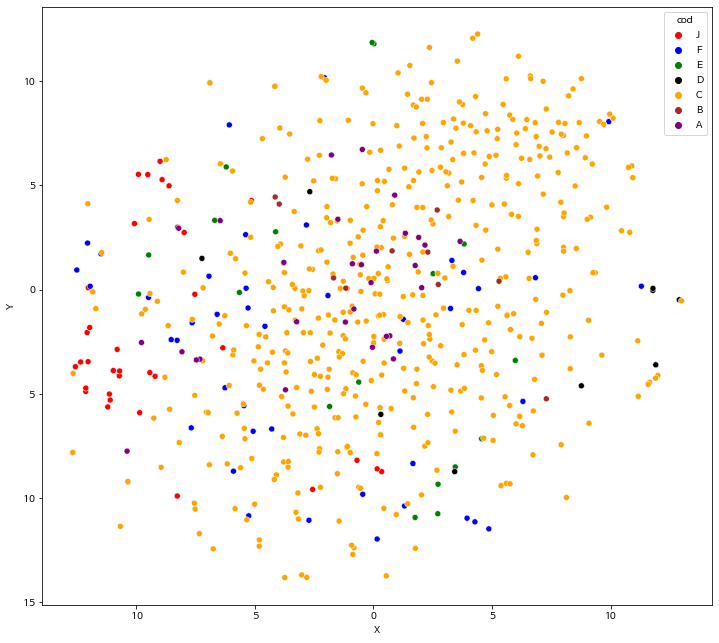

In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
sns.scatterplot(ax=ax, data=mid_vec, x="X", y="Y", hue='cod',palette=['red','blue','green','black','orange','brown','purple'],)